# Time series analysis with ML models

##Load Dataset

In [1]:
import pandas as pd

In [2]:
filename = "/content/bquxjob_519d6bb0_19238c67470.csv"

In [3]:
df=pd.read_csv(filename)

In [4]:
df.head(5)

,Date,Source,Target,NumEvents,NumArticles,QuadClass,Goldstein,SourceGeoType,SourceGeoLat,SourceGeoLong,TargetGeoType,TargetGeoLat,TargetGeoLong,ActionGeoType,ActionGeoLat,ActionGeoLong,Year
0,20220331,UKRAINIAN,UKRAINE,9,33,1,0.0,1,49.0000,32.0000,1,49.0000,32.0000,1,49.0000,32.0000,2022
1,20220331,UKRAINIAN,UKRAINE,8,30,1,3.0,4,50.4333,30.5167,4,50.4333,30.5167,4,50.4333,30.5167,2022
2,20220331,UKRAINIAN,UKRAINE,7,25,4,-10.0,4,50.4333,30.5167,4,50.4333,30.5167,4,50.4333,30.5167,2022
3,20220331,RUSSIA,UKRAINE,7,53,1,0.0,1,60.0000,100.0000,1,49.0000,32.0000,1,60.0000,100.0000,2022
4,20220331,UKRAINIAN,UKRAINE,6,18,2,7.0,1,49.0000,32.0000,1,49.0000,32.0000,1,49.0000,32.0000,2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   int64  
 1   Source         1000 non-null   object 
 2   Target         1000 non-null   object 
 3   NumEvents      1000 non-null   int64  
 4   NumArticles    1000 non-null   int64  
 5   QuadClass      1000 non-null   int64  
 6   Goldstein      1000 non-null   float64
 7   SourceGeoType  1000 non-null   int64  
 8   SourceGeoLat   998 non-null    float64
 9   SourceGeoLong  1000 non-null   float64
 10  TargetGeoType  1000 non-null   int64  
 11  TargetGeoLat   1000 non-null   float64
 12  TargetGeoLong  1000 non-null   float64
 13  ActionGeoType  1000 non-null   int64  
 14  ActionGeoLat   999 non-null    float64
 15  ActionGeoLong  1000 non-null   float64
 16  Year           1000 non-null   int64  
dtypes: float64(7), int64(8), object(2)
memory usage: 132.

In [17]:
df1 =df[['Date','Source','Target','NumEvents','NumArticles','QuadClass','Goldstein','SourceGeoLat','SourceGeoLong','TargetGeoLat','TargetGeoLong']]

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   int64  
 1   Source         1000 non-null   object 
 2   Target         1000 non-null   object 
 3   NumEvents      1000 non-null   int64  
 4   NumArticles    1000 non-null   int64  
 5   QuadClass      1000 non-null   int64  
 6   Goldstein      1000 non-null   float64
 7   SourceGeoLat   998 non-null    float64
 8   SourceGeoLong  1000 non-null   float64
 9   TargetGeoLat   1000 non-null   float64
 10  TargetGeoLong  1000 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 86.1+ KB


## Feature engineering

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
df['QuadClass'].value_counts()

,count
QuadClass,
1,622
4,155
3,120
2,103


We will have to deal with it later, since removing these can potentially lead to gap in time series data

We have two missing values in Source Geo Lat, I am filling them with mean

In [20]:
df1['SourceGeoLat'].mean()

49.815680319639284

In [25]:
df1.loc[:, 'SourceGeoLat'] = df1['SourceGeoLat'].fillna(df1['SourceGeoLat'].mean())

In [26]:
df1.head()

,Date,Source,Target,NumEvents,NumArticles,QuadClass,Goldstein,SourceGeoLat,SourceGeoLong,TargetGeoLat,TargetGeoLong
0,20220331,UKRAINIAN,UKRAINE,9,33,1,0.0,49.0000,32.0000,49.0000,32.0000
1,20220331,UKRAINIAN,UKRAINE,8,30,1,3.0,50.4333,30.5167,50.4333,30.5167
2,20220331,UKRAINIAN,UKRAINE,7,25,4,-10.0,50.4333,30.5167,50.4333,30.5167
3,20220331,RUSSIA,UKRAINE,7,53,1,0.0,60.0000,100.0000,49.0000,32.0000
4,20220331,UKRAINIAN,UKRAINE,6,18,2,7.0,49.0000,32.0000,49.0000,32.0000


In [30]:
df1['Target'].unique()

array(['UKRAINE', 'RUSSIAN', 'RUSSIA', 'DONETSK', 'UKRAINIAN',
       'AUSTRALIAN', 'AUSTRALIA', 'CRIMEA', 'UNITED STATES', 'PRESIDENT',
       'TURKEY', 'KYIV', 'CIVILIAN', 'POLISH', 'MILITARY', 'CONGRESS',
       'KIEV', 'JOE BIDEN', 'LAWMAKER', 'POLAND', 'REUTERS', 'NATO',
       'ITALIAN', 'SWITZERLAND', 'THE US', 'GERMANY',
       'INTELLIGENCE COMMUNITY', 'PARLIAMENT', 'EGYPTIAN',
       'UNITED KINGDOM', 'KHARKIV', 'SEPARATIST', 'DONBAS', 'FRANCE',
       'IAEA', 'HOSPITAL', 'SETTLEMENT', 'REFUGEE', 'ARAGON', 'UNICEF',
       'IRISH', 'BELGIAN', 'THE WHITE HOUSE', 'ARMENIAN', 'SPANISH',
       'ROMANIA', 'UNHCR', 'WARSAW', 'MOSCOW', 'RECEP TAYYIP ERDOGAN',
       'INDONESIAN', 'CHINESE', 'AUSTRIAN', 'EUROPEAN', 'BUSINESS',
       'LITHUANIAN', 'DUTCH', 'BELGIUM', 'SOUTH AFRICAN',
       'PRIME MINISTER', 'KHARKOV', 'BELARUSIAN', 'BELARUS', 'NORWEGIAN',
       'FIGHTER', 'ECONOMIST', 'ARMY', 'BERLIN', 'MOROCCO', 'THE EU',
       'JAKARTA', 'CHANCELLOR', 'WASHINGTON',
       'INTE

In [33]:
#Multiple values, removing this column for this moment

In [31]:
df1 = df1[['Date','NumEvents','NumArticles','QuadClass','Goldstein','SourceGeoLat','SourceGeoLong','TargetGeoLat','TargetGeoLong']]

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   int64  
 1   NumEvents      1000 non-null   int64  
 2   NumArticles    1000 non-null   int64  
 3   QuadClass      1000 non-null   int64  
 4   Goldstein      1000 non-null   float64
 5   SourceGeoLat   1000 non-null   float64
 6   SourceGeoLong  1000 non-null   float64
 7   TargetGeoLat   1000 non-null   float64
 8   TargetGeoLong  1000 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 70.4 KB


In [34]:
# Latitude and Longitude
df['SourceGeoLat_sin'] = np.sin(df['SourceGeoLat'] * (2. * np.pi / 360))
df['SourceGeoLat_cos'] = np.cos(df['SourceGeoLat'] * (2. * np.pi / 360))
df['SourceGeoLong_sin'] = np.sin(df['SourceGeoLong'] * (2. * np.pi / 360))
df['SourceGeoLong_cos'] = np.cos(df['SourceGeoLong'] * (2. * np.pi / 360))

df['TargetGeoLat_sin'] = np.sin(df['TargetGeoLat'] * (2. * np.pi / 360))
df['TargetGeoLat_cos'] = np.cos(df['TargetGeoLat'] * (2. * np.pi / 360))
df['TargetGeoLong_sin'] = np.sin(df['TargetGeoLong'] * (2. * np.pi / 360))
df['TargetGeoLong_cos'] = np.cos(df['TargetGeoLong'] * (2. * np.pi / 360))


In [35]:
df1.drop(['SourceGeoLat', 'SourceGeoLong', 'TargetGeoLat', 'TargetGeoLong'], axis=1, inplace=True)

**Lag Features**: Out of all the features we have taken, we won't be having the knowledge of NumEvents, NumArticles,Goldstein beforehand. So we will create a lag for these. Which uses previous values of these. We can find optimal value of Lag using many methods -
- Using ACF/PACF
- During cross validation with grid search

### ACF/PACF: Autocorrelation and Partial Autocorrelation Functions

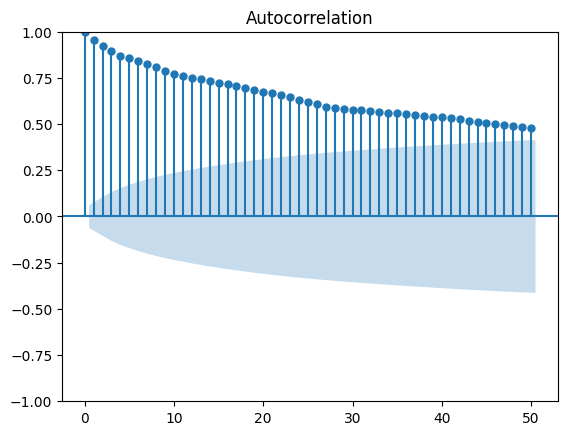

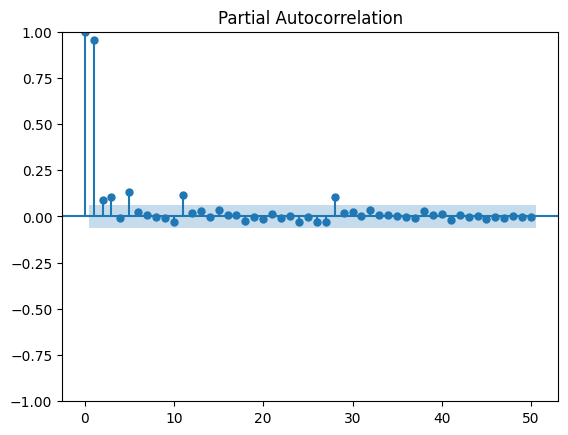

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df['NumEvents'], lags=50)  # Plot ACF up to 20 lags
plot_pacf(df['NumEvents'], lags=50) # Plot PACF up to 20 lags
plt.show()

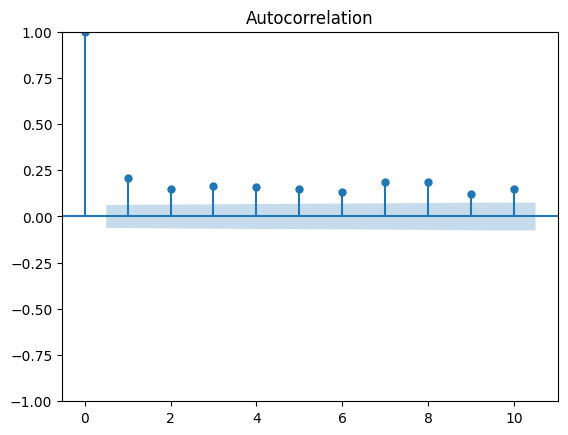

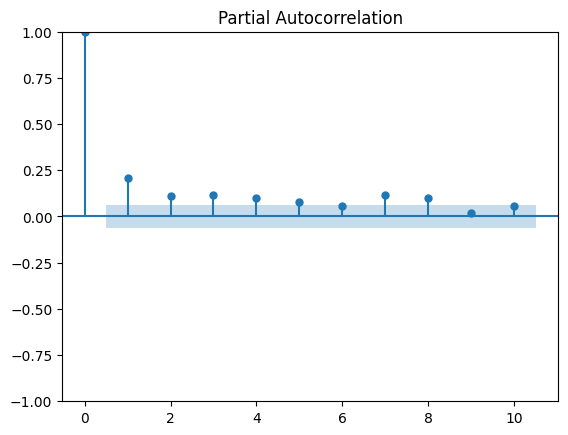

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df['NumArticles'], lags=10)
plot_pacf(df['NumArticles'], lags=10)
plt.show()

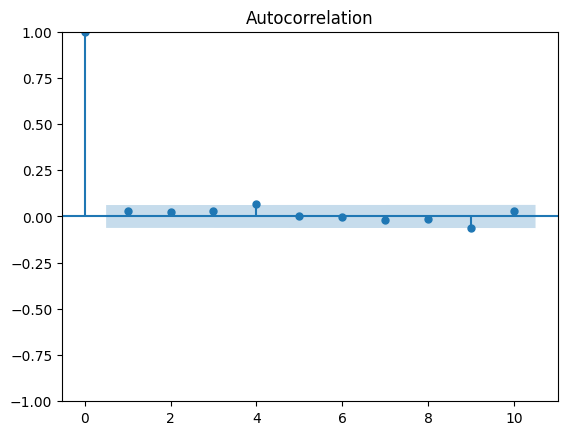

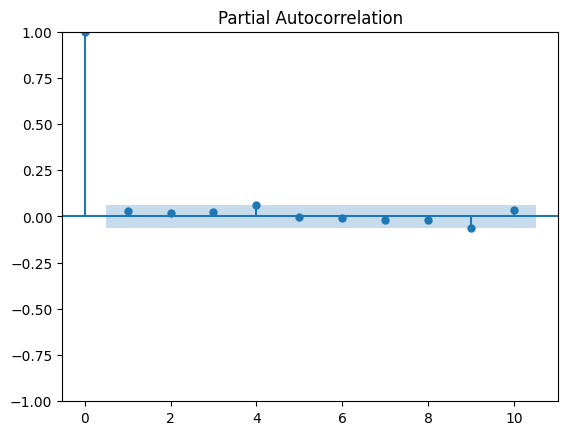

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df['Goldstein'], lags=10)
plot_pacf(df['Goldstein'], lags=10)
plt.show()

In [46]:
#let us start with 2 and then we can change it later

There is one more problem: date is same in multiple columns hence we need to group it by data and take mean of other, might not be appropriate for variables like long,lat, but i don't know any other method right now.

In [47]:
df_agg = df.groupby('Date').agg({
    'NumEvents': 'sum',
    'NumArticles': 'sum',
    'Goldstein': 'mean',
    'SourceGeoLat': 'mean',  # Or 'mode' depending on your context
    'SourceGeoLong': 'mean', # Or 'mode'
    'TargetGeoLat': 'mean',  # Or 'mode'
    'TargetGeoLong': 'mean'  # Or 'mode'
}).reset_index()

In [48]:
df_agg.head()

,Date,NumEvents,NumArticles,Goldstein,SourceGeoLat,SourceGeoLong,TargetGeoLat,TargetGeoLong
0,20220331,2328,10680,0.7626,49.81568,39.429743,48.9505,39.651516


In [49]:
#stopping the time series here, you know the reason

In [ ]:
df['NumEvents_lagged_1'] = df['NumEvents'].shift(2).fillna(0)
df['NumArticles_lagged_1'] = df['NumArticles'].shift(2).fillna(0)
df['Goldstein_lagged_1'] = df['Goldstein'].shift(2).fillna(0)

## Data Preparation

In [51]:
df1.head()

,Date,NumEvents,NumArticles,QuadClass,Goldstein
0,20220331,9,33,1,0.0
1,20220331,8,30,1,3.0
2,20220331,7,25,4,-10.0
3,20220331,7,53,1,0.0
4,20220331,6,18,2,7.0


In [53]:
X = df1.drop(['Date', 'QuadClass'], axis=1)
y = df1['QuadClass']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [58]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       124
           2       0.83      0.53      0.65        19
           3       0.84      0.84      0.84        25
           4       0.88      0.91      0.89        32

    accuracy                           0.91       200
   macro avg       0.87      0.81      0.83       200
weighted avg       0.91      0.91      0.90       200

